<a href="https://colab.research.google.com/github/moniic/Playstore-Apps-Analysis-EDA/blob/main/Play_Store_App_Review_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store app data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for category, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
# Importing libraries for data analysis
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from PIL import Image
import seaborn as sns
import numpy as np
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Play store dataset, User reviews dataset.

In [ ]:
#using pandas library and 'read_csv' function to read App_data file and User_review file
df_app_data = pd.read_csv('/content/drive/MyDrive/Play Store Data.csv')
df_user_review = pd.read_csv('/content/drive/MyDrive/User Reviews.csv')

# Introduction to Data

In [ ]:
df_app_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Understanding Play Store Dataset.
Firstly let's get to know data by using Pandas library.





In [ ]:
# Checking the info of App_data file
df_app_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Checking the info of the User_review file
df_user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


# Exploring,Wrangling and Cleaning Data

In [ ]:
# Check for duplicated rows in app data
df_app_data.duplicated().value_counts()

False    10358
True       483
dtype: int64

In [ ]:
app_data = df_app_data.drop_duplicates(subset = None, keep = 'first',inplace = False)
app_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
app_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10358,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10358,34,FAMILY,1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,8893.0,NaN,NaN,NaN,4.189542,0.545452,1.0,4.0,4.3,4.5,19.0
Reviews,10358,6002,0,593,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10358,462,Varies with device,1526,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10358,22,"1,000,000+",1488,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10357,3,Free,9591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10358,93,0,9592,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10357,6,Everyone,8382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10358,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
app_data.shape

(10358, 13)

In [ ]:
app_data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
 #To check & count the null values in all columns
app_data.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# To replace the null values with zero in Rating column
app_data.fillna({'Rating': 0}, inplace = True)

In [ ]:
app_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [ ]:
app_data[app_data['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
app_data.loc[10472] = app_data.loc[10472].shift()
app_data['App'].loc[10472] = app_data['Category'].loc[10472]
app_data['Category'].loc[10472] = np.nan
app_data.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [ ]:
app_data.dtypes

App               object
Category          object
Rating            object
Reviews           object
Size              object
Installs          object
Type              object
Price             object
Content Rating    object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
dtype: object

Data type of Rating is object. If we convert from string to numeric, we can make our analysis easy.

In [ ]:
app_data['Rating'] = pd.to_numeric(app_data['Rating'])
app_data['Rating'].dtype

dtype('float64')

Similarly, we can change other columns data-types according to the values it contains.

In [ ]:
app_data['Reviews'] =app_data['Reviews'].astype(float)
app_data['Reviews'].dtype


dtype('float64')

In [ ]:
app_data['Installs'] = app_data['Installs'].astype(str).str.replace(",","")
app_data['Installs'] = app_data['Installs'].astype(str).str.replace("+","")
app_data['Installs'] = app_data['Installs'].astype(int)
app_data['Installs'].dtype


dtype('int64')

In [ ]:
app_data['Size'] = app_data.Size.replace("Varies with device",np.nan)

In [ ]:
#let's proceed with examing some interesting categorical unique values

#examining the unique values of n_group as this column will appear very handy for later analysis
app_data.Type.unique()

array(['Free', 'Paid', nan], dtype=object)

In [ ]:
app_data.Type.value_counts()

Free    9592
Paid     765
Name: Type, dtype: int64

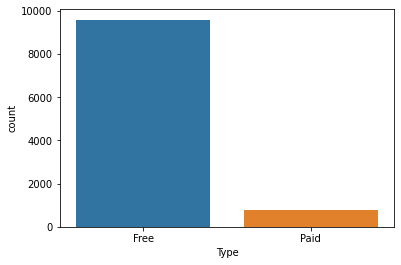

In [ ]:
sns.countplot(app_data.Type)

In [ ]:
app_data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
app_data.rename(columns={'Price':'Price($)'},inplace=True)

In [ ]:
app_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price($)', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
app_data['Price($)'] = app_data['Price($)'].str.replace("$","")
app_data['Price($)'] = app_data['Price($)'].str.replace("nan","0.0")
app_data['Price($)'] = pd.to_numeric(app_data['Price($)']) 
app_data['Price($)'].dtype

dtype('float64')

In [ ]:
app_data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
app_data[app_data['Content Rating']== 'Unrated'] = np.nan

In [ ]:
app_data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', nan], dtype=object)

In [ ]:
app_data['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

# Visualizing Data

Exploring the data by analyzing its statistics and visualizing the values of features and correlations between different features. Explaining the process and the results.

### (1). Unique number of Categories in the Play Store apps dataset.

In [ ]:
# Exploring and analyzing different number of Categories in Apps Data.
diff_category = app_data.Category.value_counts().reset_index().rename(columns={'index':'Category','Category':'Counts'})
diff_category

,Category,Counts
0,FAMILY,1942
1,GAME,1121
2,TOOLS,842
3,BUSINESS,427
4,MEDICAL,408
5,PRODUCTIVITY,407
6,PERSONALIZATION,388
7,LIFESTYLE,373
8,COMMUNICATION,366
9,FINANCE,360


### (2). Top 5 Categories with respect to the number of app counts.

In [ ]:
# Here we can see the top 5 Categories using (.head) method.
top_five_categories = diff_category.head()  
top_five_categories

,Category,Counts
0,FAMILY,1942
1,GAME,1121
2,TOOLS,842
3,BUSINESS,427
4,MEDICAL,408


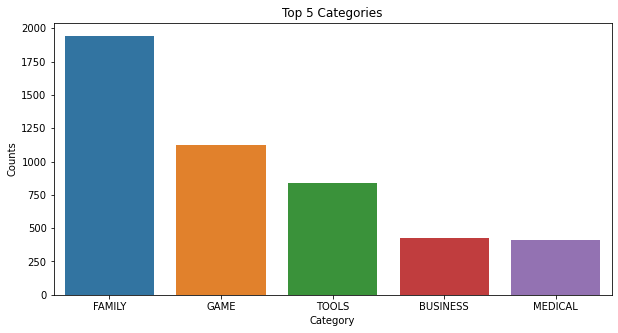

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel("Category")
plt.ylabel("Counts")
plt.title("Top 5 Categories")
sns.barplot(data=top_five_categories,x='Category', y='Counts')


## (3) Categories associated with top 5 Apps having highest rating.

In [ ]:
#Sort Rating column frpm highest to lowest to get the Top 5 higest rating apps
top_rated_apps = app_data.sort_values (['Rating'], ascending = False).reset_index(drop = True).head(5)

top_rated_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,RETRO Shocked DW-6000,PERSONALIZATION,5.0,13.0,500k,100.0,Paid,1.49,Everyone,Personalization,"April 4, 2017",1.2,2.3 and up
1,EB Cash Collections,BUSINESS,5.0,1.0,4.3M,5.0,Free,0.00,Everyone,Business,"July 31, 2018",1.10,4.4 and up
2,Zen Leaf,MEDICAL,5.0,1.0,6.1M,100.0,Free,0.00,Mature 17+,Medical,"March 8, 2018",2.3.5,4.1 and up
3,FHR 5-Tier 2.0,MEDICAL,5.0,2.0,1.2M,500.0,Paid,2.99,Everyone,Medical,"December 16, 2015",1.0,4.0 and up
4,CB News,FAMILY,5.0,7.0,20M,50.0,Free,0.00,Everyone,Education,"September 10, 2016",1.2.0,4.1 and up


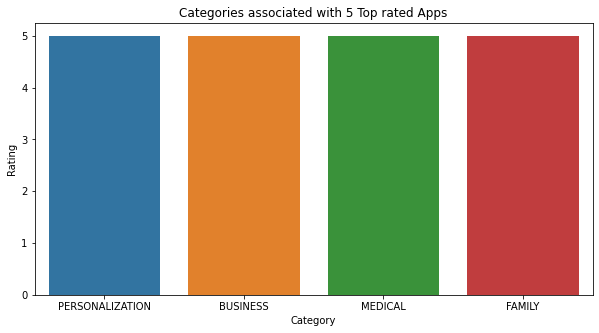

In [ ]:
plt.figure(figsize = (10, 5))
plt.title('Categories associated with 5 Top rated Apps')
plt.xlabel('Category')
plt.ylabel('Rating')

sns.barplot(data = top_rated_apps, x = 'Category', y = 'Rating')

plt.show()

## (4). Number of installed applications for top 20-Categories w.r.t. number of App counts.

In [ ]:
category_installs = app_data.groupby(['Category'])['Installs'].sum()
top_category_installs = pd.merge(diff_category, category_installs, on='Category')
top_20_category_installs = top_category_installs.head(20)
top_20_category_installs

,Category,Counts,Installs
0,FAMILY,1942,1.004169e+10
1,GAME,1121,3.154402e+10
2,TOOLS,842,1.145272e+10
3,BUSINESS,427,8.636649e+08
4,MEDICAL,408,4.220418e+07
5,PRODUCTIVITY,407,1.246309e+10
6,PERSONALIZATION,388,2.074495e+09
7,LIFESTYLE,373,5.348235e+08
8,COMMUNICATION,366,2.415228e+10
9,FINANCE,360,7.703487e+08


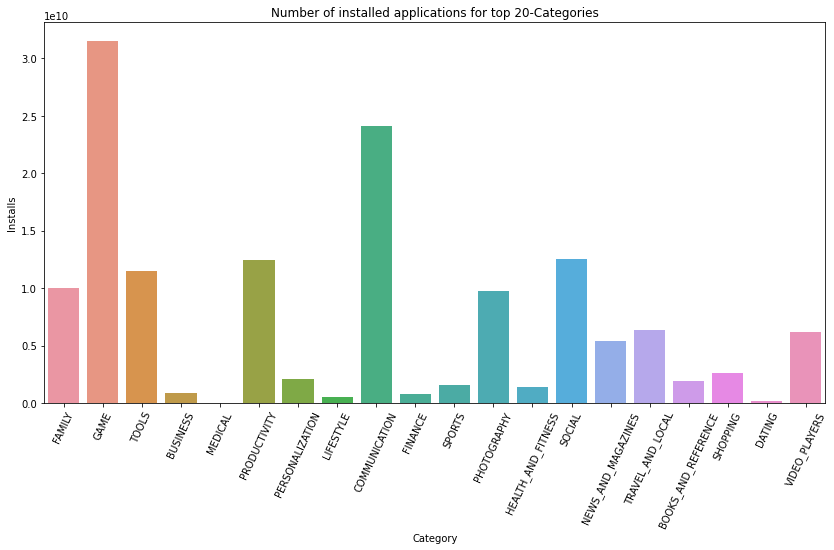

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed applications for top 20-Categories")
sns.barplot(data=top_20_category_installs,x='Category',y='Installs')
plt.show()

## (5). Number of applications installed for top 20 Genres.

In [ ]:
top_genres = app_data.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})
genres_installs = app_data.groupby(['Genres'])['Installs'].sum()

top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_20_genres_installs = top_genres_installs.head(20)
top_20_genres_installs

,Genres,Count,Installs
0,Tools,841,1.144272e+10
1,Entertainment,587,4.680714e+09
2,Education,527,3.734101e+08
3,Business,427,8.636649e+08
4,Medical,408,4.220418e+07
5,Productivity,407,1.246309e+10
6,Personalization,388,2.074495e+09
7,Lifestyle,372,5.248235e+08
8,Communication,366,2.415228e+10
9,Sports,364,2.544574e+09


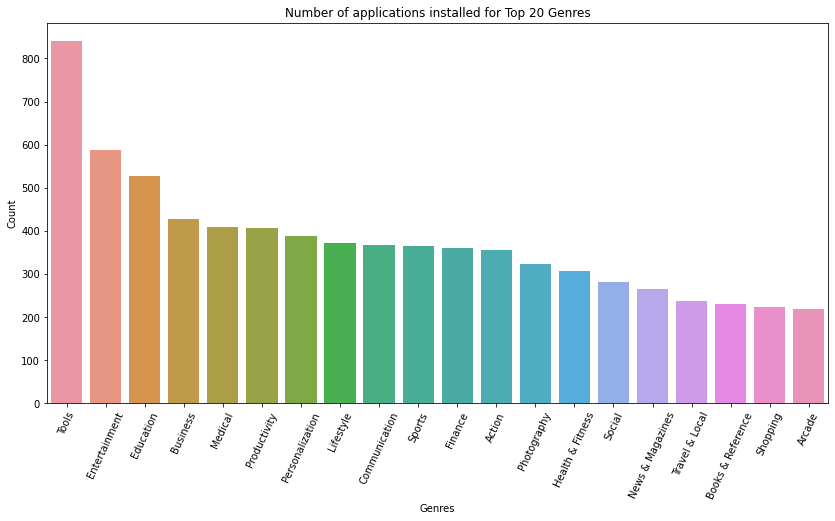

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Count")
plt.title("Number of applications installed for Top 20 Genres")
sns.barplot(data=top_20_genres_installs,x='Genres',y='Count')
plt.show()

###Genres Most Installed By Teens

In [ ]:
# Top genres from 'Teen' content rated 
teen= app_data[app_data['Content Rating'] == 'Teen']
genre_teen = teen.Genres.value_counts().reset_index().rename(columns = {'Genres':'Count','index':'Genres'})

In [ ]:
# genres most installed by teens
genre_installs = teen.groupby(['Genres'])['Installs'].sum()

gen_by_teens = pd.merge(genre_teen, genre_installs, on='Genres').sort_values(by ='Installs', ascending= False)
top10_genbyteens = gen_by_teens.head(10)

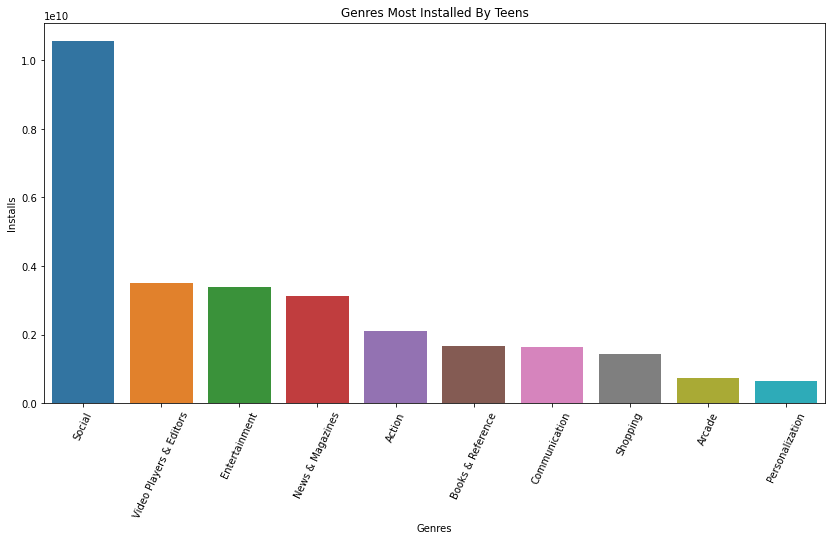

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Genres Most Installed By Teens")
sns.barplot(data= top10_genbyteens, x= 'Genres', y= 'Installs')
plt.show()

## (6) Top 5 Apps which has maximum reviews.

In [ ]:
Max_reviews_Apps = app_data.sort_values(['Reviews'], ascending = False)
Max_reviews_Apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,NaN,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208.0,NaN,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446.0,NaN,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8614,Sweden Newspapers,NEWS_AND_MAGAZINES,0.0,0.0,2.1M,0.000000e+00,Free,0.0,Everyone,News & Magazines,"July 7, 2018",1.1,4.4 and up
8612,DN Snacks,BUSINESS,0.0,0.0,7.6M,1.000000e+00,Free,0.0,Everyone,Business,"April 9, 2018",1.0.0,4.0 and up
6329,Basic Strategy Training BJ 21,GAME,0.0,0.0,23M,5.000000e+02,Free,0.0,Teen,Casino,"March 7, 2016",1.1,2.3 and up
7312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Remove duplicate rows from the Play store App Data
max_reviews_App_updated = Max_reviews_Apps.drop_duplicates(subset = 'App').head(5).reset_index()
max_reviews_App_updated

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,2544,Facebook,SOCIAL,4.1,78158306.0,NaN,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
1,336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2,2604,Instagram,SOCIAL,4.5,66577446.0,NaN,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3,382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
4,1879,Clash of Clans,GAME,4.6,44893888.0,98M,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up


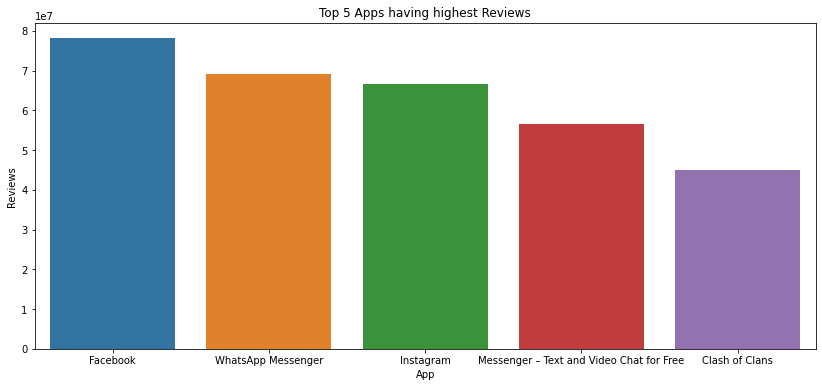

In [ ]:
plt.figure(figsize = (14,6))
plt.title('Top 5 Apps having highest Reviews')
plt.xlabel('App')
plt.ylabel('Reviews')
sns.barplot(data = max_reviews_App_updated, x = 'App', y = 'Reviews')
plt.show()

## (7) Which App has highest reviews?

In [ ]:
# To check the highest reviews from the Play store app dataset
app_data['Reviews'].max()


78158306.0

In [ ]:
app_data.loc[app_data['Reviews'].idxmax()]


App                         Facebook
Category                      SOCIAL
Rating                           4.1
Reviews                   78158306.0
Size                             NaN
Installs                1000000000.0
Type                            Free
Price($)                         0.0
Content Rating                  Teen
Genres                        Social
Last Updated          August 3, 2018
Current Ver       Varies with device
Android Ver       Varies with device
Name: 2544, dtype: object

## (8) Which is the highest rating App?

In [ ]:
# To find the maximum value of Rating column variable
app_data.loc[app_data['Rating'].idxmax()]

App               Hojiboy Tojiboyev Life Hacks
Category                                COMICS
Rating                                     5.0
Reviews                                   15.0
Size                                       37M
Installs                                1000.0
Type                                      Free
Price($)                                   0.0
Content Rating                        Everyone
Genres                                  Comics
Last Updated                     June 26, 2018
Current Ver                                2.0
Android Ver                       4.0.3 and up
Name: 329, dtype: object

## (9). Calculating average or (mean) price of the paid Apps.

In [ ]:
app_data['Price($)'].unique() # Unique number of prices

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,    nan,   1.96,  19.4 ,
         3.9 ,   4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,
        28.99,   2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,
         3.61, 394.99,   1.26,   1.2 ,   1.04])

In [ ]:
app_data[app_data['Price($)'] =='nan']

,App,Category,Rating,Reviews,Size,Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
# Selecting all the paid Apps from the Data.
paid_apps_price =app_data.loc[app_data['Price($)'] !=0.0,].reset_index()
paid_apps_price


,index,App,Category,Rating,Reviews,Size,Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6.8M,100000.0,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
1,235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39M,100000.0,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
2,427,Puffin Browser Pro,COMMUNICATION,4.0,18247.0,NaN,100000.0,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
3,476,"Moco+ - Chat, Meet People",DATING,4.2,1545.0,NaN,10000.0,Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
4,477,Calculator,DATING,2.6,57.0,6.2M,1000.0,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,10735,FP VoiceBot,FAMILY,0.0,17.0,157k,100.0,Paid,0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up
763,10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35.0,2.4M,1000.0,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
764,10782,Trine 2: Complete Story,GAME,3.8,252.0,11M,10000.0,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up
765,10785,"sugar, sugar",FAMILY,4.2,1405.0,9.5M,10000.0,Paid,1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up


###  Average price of all the paid Apps.Calculating 3M's for clear understanding of price distribution of paid Apps.

In [ ]:
# Mean price of all the paid Apps.
avg_price = paid_apps_price['Price($)'].mean().round(2)
print(f"Average or mean price of paid Apps is ${avg_price}")

# Median price of all the paid Apps.
med_price =paid_apps_price['Price($)'].median().round(2)
print(f"Median price of paid Apps is ${med_price}")

# Mode of the price of all the paid Apps
mode_price =paid_apps_price['Price($)'].mode().round(2)
print(f"Mode of prices of paid Apps is ${mode_price}")

Average or mean price of paid Apps is $13.96
Median price of paid Apps is $2.99
Mode of prices of paid Apps is $0    0.99
dtype: float64


## (10) finding top 3 paid apps generating most revenue

In [ ]:
df_paid_apps = app_data[app_data['Type']=='Paid']
df_paid_apps.rename(columns={'Price':'Price($)'},inplace=True)

In [ ]:
df_paid_apps['Total Revenue'] = df_paid_apps['Price($)']* df_paid_apps['Installs']

In [ ]:
df_paid_apps = df_paid_apps[['App','Installs','Price($)','Total Revenue']]

In [ ]:
df_paid_apps = df_paid_apps.drop_duplicates(subset = 'App')
df_paid_apps = df_paid_apps.sort_values(by = ['Total Revenue'],ascending = False)
df_paid_apps

,App,Installs,Price($),Total Revenue
2241,Minecraft,10000000.0,6.99,69900000.0
5351,I am rich,100000.0,399.99,39999000.0
5356,I Am Rich Premium,50000.0,399.99,19999500.0
4034,Hitman Sniper,10000000.0,0.99,9900000.0
7417,Grand Theft Auto: San Andreas,1000000.0,6.99,6990000.0
...,...,...,...,...
5945,Ain Arabic Kids Alif Ba ta,0.0,2.99,0.0
5486,AP Series Solution Pro,0.0,1.99,0.0
6692,cronometra-br,0.0,154.99,0.0
9337,EG | Explore Folegandros,0.0,3.99,0.0


In [ ]:
print(df_paid_apps.head())


                                App    Installs  Price($)  Total Revenue
2241                      Minecraft  10000000.0      6.99     69900000.0
5351                      I am rich    100000.0    399.99     39999000.0
5356              I Am Rich Premium     50000.0    399.99     19999500.0
4034                  Hitman Sniper  10000000.0      0.99      9900000.0
7417  Grand Theft Auto: San Andreas   1000000.0      6.99      6990000.0


##(11) Top 5 free strategy games

In [ ]:
app_data['Type'] = app_data['Type'].astype(str)
df_games = app_data[app_data['Category'] == 'GAME']
df_free_games = df_games[df_games['Type'] == 'Free']
df_strategy_free_games = df_free_games[df_free_games['Genres'] == 'Strategy']
df_strategy_free_games['Reviews'] =df_strategy_free_games['Reviews'].astype(int)
df_strategy_free_games = df_strategy_free_games.sort_values(by=['Rating','Reviews'],ascending=[False,False]).reset_index()
df_strategy_free_games = df_strategy_free_games.drop_duplicates(subset = 'App')
df_strategy_free_games.head(5)

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,1879,Clash of Clans,GAME,4.6,44893888,98M,100000000.0,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
2,1878,Clash Royale,GAME,4.6,23136735,97M,100000000.0,Free,0.0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up
5,1790,Castle Clash: Heroes of the Empire US,GAME,4.6,4578476,24M,50000000.0,Free,0.0,Everyone 10+,Strategy,"July 17, 2018",1.4.51,4.1 and up
6,1998,Stick War: Legacy,GAME,4.6,811040,77M,10000000.0,Free,0.0,Teen,Strategy,"May 10, 2018",1.7.04,4.4 and up
7,1807,Disney Heroes: Battle Mode,GAME,4.6,102107,NaN,5000000.0,Free,0.0,Everyone 10+,Strategy,"July 31, 2018",1.2.2,Varies with device


## (12). Number of Apps associated with different Content Rating.

In [ ]:
Unique_content_Rating_type = app_data['Content Rating'].value_counts().reset_index().rename(columns={'index':'Content Rating','Content Rating':'Counts'})

In [ ]:
diff_content_rated_apps = app_data.groupby(['Content Rating'])['App'].sum()

In [ ]:
content_rating_viz = pd.merge(Unique_content_Rating_type,diff_content_rated_apps, on='Content Rating')


In [ ]:
content_rating_viz

,Content Rating,Counts,App
0,Everyone,8383,Photo Editor & Candy Camera & Grid & ScrapBook...
1,Teen,1146,Sketch - Draw & PaintTattoo Name On My Photo E...
2,Mature 17+,447,"Secrets of beauty, youth and healthDresses Ide..."
3,Everyone 10+,377,Superheroes Wallpapers | 4K BackgroundsPolice ...
4,Adults only 18+,3,Manga Master - Best manga & comic readerDraftK...


In [ ]:
content_rated = content_rating_viz['Content Rating']
App_counts = content_rating_viz['Counts']

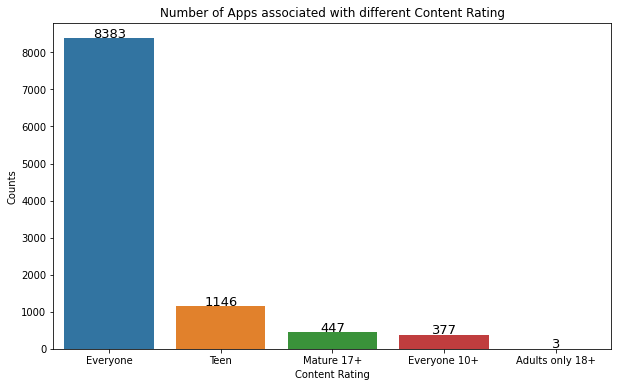

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Number of Apps associated with different Content Rating")
sns.barplot(data=content_rating_viz,x = content_rated, y= App_counts)
for index, data in enumerate(App_counts):      # Display the data values over the bars
  plt.text(x=index, y= data+29,s=f"{data}",ha='center', fontsize=13)
plt.show()



#Let's explore another dataset which we have (User Reviews)

In [ ]:
df_user_review

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


## Understanding and cleaning User Review dataset.

In [ ]:
# Checking the info of the User_review file
df_user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
#To check & count the null values in all columns

df_user_review.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
# To replace all the null values with zero in Rating column
df_user_review.fillna({'Translated_Review':0, 'Sentiment':0, 'Sentiment_Polarity': 0, 'Sentiment_Subjectivity':0}, inplace = True)

In [ ]:
df_user_review.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
 user_data = df_user_review.drop_duplicates(subset = None, keep = 'first', inplace = False)

 user_data.shape

(30679, 5)

# Data Wrangling and Vizualization. 

## (1) Identify the User sentiment type ratio.

In [ ]:
user_sentiment = user_data['Sentiment'].value_counts().reset_index().rename(columns= {'index' : 'Sentiment', 'Sentiment' : 'Counts'})
print(user_sentiment)

  Sentiment  Counts
0  Positive   19015
1  Negative    6321
2   Neutral    4361
3         0     982


In [ ]:
user_sentiment_updated = user_sentiment.drop(3)

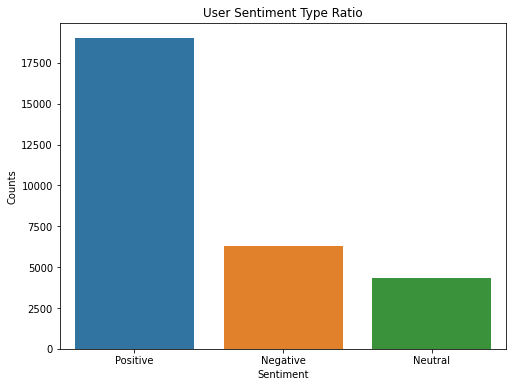

In [ ]:
plt.figure(figsize = (8,6))
plt.title('User Sentiment Type Ratio')
plt.xlabel ('Sentiment')
sns.barplot(data = user_sentiment_updated, x = 'Sentiment', y = 'Counts')
plt.show()

## (2)Identify Top 5 Apps having Positive user reviews 'sentiment'. 

In [ ]:
App_sentiment = user_data.groupby(['App', 'Sentiment']).size().sort_values(ascending = False).reset_index().rename(columns = {0 : 'Counts'})
App_sentiment

,App,Sentiment,Counts
0,ColorNote Notepad Notes,Positive,91
1,Calorie Counter - Macros,Positive,87
2,Family Locator - GPS Tracker,Positive,85
3,8fit Workouts & Meal Planner,Positive,82
4,Calorie Counter - MyNetDiary,Positive,82
...,...,...,...
3353,DEER HUNTER 2018,0,1
3354,DEAD TARGET: FPS Zombie Apocalypse Survival Games,0,1
3355,DC Super Hero Girls™,Neutral,1
3356,DC Super Hero Girls™,0,1


In [ ]:
Apps_positive_sentiment = pd.DataFrame(App_sentiment[App_sentiment['Sentiment'] == 'Positive']).head(5).reset_index()
Apps_positive_sentiment

,index,App,Sentiment,Counts
0,0,ColorNote Notepad Notes,Positive,91
1,1,Calorie Counter - Macros,Positive,87
2,2,Family Locator - GPS Tracker,Positive,85
3,3,8fit Workouts & Meal Planner,Positive,82
4,4,Calorie Counter - MyNetDiary,Positive,82


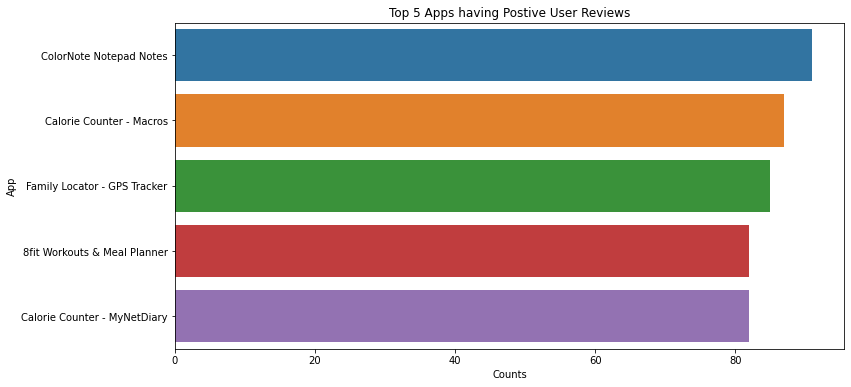

In [ ]:
plt.figure(figsize = (12,6))
plt.title('Top 5 Apps having Postive User Reviews')
plt.xlabel('Counts')
sns.barplot(data = Apps_positive_sentiment, x = 'Counts', y = 'App')
plt.show()

## (3)Identify Top 5 Apps having negative user reviews 'sentiment'.

In [ ]:
#Display top 5 maximum negative user sentiment reviews
Apps_negative_sentiment = pd.DataFrame(App_sentiment[App_sentiment['Sentiment'] == 'Negative']).head(5).reset_index()
Apps_negative_sentiment

,index,App,Sentiment,Counts
0,22,Facebook,Negative,59
1,24,Be A Legend: Soccer,Negative,59
2,25,Angry Birds Classic,Negative,59
3,32,Cooking Fever,Negative,57
4,46,Gardenscapes,Negative,50


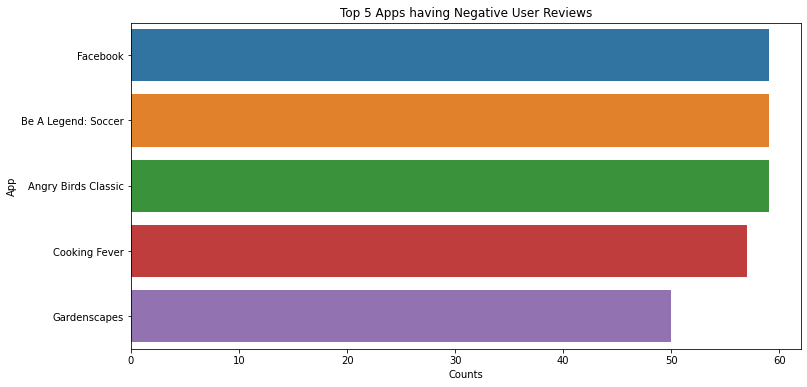

In [ ]:
plt.figure(figsize = (12,6))
plt.title('Top 5 Apps having Negative User Reviews')
plt.xlabel('Counts')
sns.barplot(data = Apps_negative_sentiment, x = 'Counts', y = 'App')
plt.show()

## (4) Study of 8 ball pool application reviews

In [ ]:
user_data['Sentiment'] = user_data['Sentiment'].astype(str)
df_reveiews_pool = user_data[user_data['App']=='8 Ball Pool']
df_reveiews_pool['Sentiment'] = df_reveiews_pool.Sentiment.replace('nan',np.nan)

In [ ]:
df_reveiews_pool['Sentiment'].isnull().sum()

0

In [ ]:
df_reveiews_pool.dropna(subset=['Sentiment'])

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
1258,8 Ball Pool,0,0,0.000000,0.000000
1262,8 Ball Pool,The better pool game Google Play slightly bugg...,Negative,-0.013333,0.413333
1263,8 Ball Pool,Hate get cue pieces maxed cue. Really wish guy...,Negative,-0.140000,0.300000
1264,8 Ball Pool,"Games alright, bit sketchy either opponent bad...",Negative,-0.303571,0.650595
1265,8 Ball Pool,Hi really like game. I tried ti purchase hallo...,Negative,-0.066667,0.200000
...,...,...,...,...,...
1513,8 Ball Pool,Great addictive game... One thing guys improve...,Positive,0.100000,0.662500
1514,8 Ball Pool,Lovely game. With lovely graphics controls. If...,Positive,0.121429,0.621429
1515,8 Ball Pool,I love game... gets trouble everyday... The th...,Negative,-0.100000,0.516667
1516,8 Ball Pool,This fu*king stupidity... glitche much... advi...,Negative,-0.360000,0.520000


In [ ]:
df_reveiews_pool = df_reveiews_pool['Sentiment'].value_counts()
df_reveiews_pool

Positive    48
Negative    46
Neutral      2
0            1
Name: Sentiment, dtype: int64

In [ ]:
df_reveiews_pool = df_reveiews_pool.drop('0')

([<matplotlib.patches.Wedge at 0x7f2e58ae5a30>,
 [Text(6.735557395310444e-17, 1.1, 'Negative'),
  Text(-0.07194347640946609, -1.0976448133171863, 'Postive'),
  Text(1.0976448112122377, -0.0719435085247544, 'Neutral')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-0.03924189622334513, -0.5987153527184652, '47.9%'),
  Text(0.5987153515703113, -0.039241913740775125, '2.1%')])

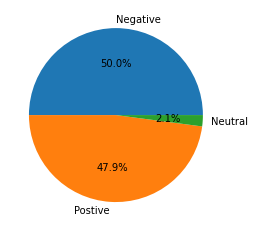

In [ ]:
plt.pie(df_reveiews_pool,labels = ['Negative','Postive','Neutral'],autopct='%1.1f%%',)

## (5) Playstore Review analysis between google news and BBC news

In [ ]:
user_data['Sentiment'] = user_data['Sentiment'].astype(str)
df_reveiews_pool_BBC = user_data[user_data['App']=='BBC News']
df_reveiews_pool_BBC['Sentiment'] = df_reveiews_pool_BBC.Sentiment.replace('nan',np.nan)
df_reveiews_pool_BBC.dropna(subset=['Sentiment'])
df_reveiews_pool_BBC = df_reveiews_pool_BBC[df_reveiews_pool_BBC['Sentiment']!='Neutral']
df_reveiews_pool_BBC = df_reveiews_pool_BBC['Sentiment'].value_counts()
df_reveiews_pool_BBC

Positive    22
Negative    10
0            1
Name: Sentiment, dtype: int64

In [ ]:
user_data['Sentiment'] = user_data['Sentiment'].astype(str)
df_reveiews_pool_Google = user_data[user_data['App']=='Google News']
df_reveiews_pool_Google['Sentiment'] = df_reveiews_pool_Google.Sentiment.replace('nan',np.nan)
df_reveiews_pool_Google.dropna(subset=['Sentiment'])
df_reveiews_pool_Google = df_reveiews_pool_Google['Sentiment'].value_counts()
df_reveiews_pool_Google

Positive    27
Negative    13
0            1
Name: Sentiment, dtype: int64

           Positive  Negative  0         Apps
Sentiment        22        10  1     BBC News
Sentiment        27        13  1  Google News


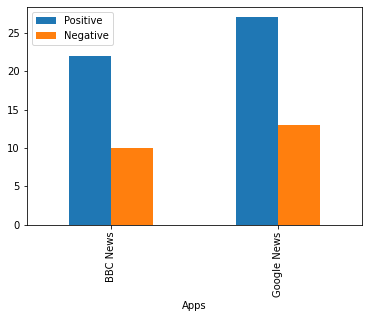

In [ ]:
new_df = pd.concat([df_reveiews_pool_BBC,df_reveiews_pool_Google], axis=1)

new_df = new_df.transpose()
new_df['Apps'] = ['BBC News','Google News']
print(new_df)
new_df.plot(x = 'Apps',y=["Positive", "Negative"], kind="bar")

## (6). Generate WordCloud for "Amazon Kindle" App from column Translated_Review.

In [ ]:
diff_apps = pd.DataFrame(user_data['App'].unique())


In [ ]:
kindle_review= user_data[user_data['App']== 'Amazon Kindle']
kindle_review

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
6372,Amazon Kindle,"OK, despite experience could little intuitive,...",Positive,0.251389,0.516667
6373,Amazon Kindle,I like reading alternitive Galaxy Tab S2 basic...,Positive,0.079861,0.459722
6374,Amazon Kindle,I want option remove page flip. Im already irr...,Negative,-0.169141,0.325000
6375,Amazon Kindle,I used LOVE kindle app. Read s7 edge time. Now...,Negative,-0.020000,0.480000
6376,Amazon Kindle,The functional ability Kindle library great me...,Positive,0.140000,0.590000
...,...,...,...,...,...
6501,Amazon Kindle,Love Kindle awesome.,Positive,0.750000,0.800000
6503,Amazon Kindle,Are useless,Negative,-0.500000,0.200000
6506,Amazon Kindle,"Up whatsapp,nice nice",Positive,0.600000,1.000000
6507,Amazon Kindle,Great love read,Positive,0.650000,0.675000


In [ ]:
# Generate WordCloud for column Translated_Review

# Text of all words in column Translated_Review
text = " ".join(review for review in user_data.Translated_Review.astype(str))
print (f"There are {len(text)} words in the combination of cells in column Translated_Review.")

There are 3205598 words in the combination of cells in column Translated_Review.


In [ ]:
# Create stopword list:
# remove words that we want to exclude
stopwords = set(STOPWORDS)
stopwords.update(["nan","game"])


You can use any shape you want with the WorldCloud method in Python.

To create a shape for your WordCloud, first, you need to find a (JPG or png) file to become the mask. Below is a kindle logo that I found on the internet:

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

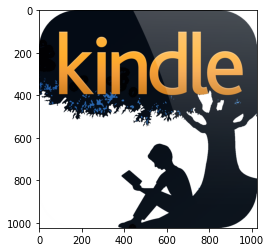

In [ ]:
# Loading the image file and converting png image to a numpy array
# Now, let's create a Kindle logo-shaped word cloud for words in column Translated_Review.
kindle_mask = np.array(Image.open('/content/drive/MyDrive/kindle-logo.png'))

# Display the image.
plt.imshow(kindle_mask)
kindle_mask

The way the masking functions works is that it requires all-white part of the mask should be 255. If you use a JPG file then you should get 255 in your array, while PNG file will populate your array with 0 (integer type). This value represents the "intensity" of the pixel. Values of 255 are pure white, whereas values of 1 are black. Please note that WorldCloud will not work with the PNG image straight away and you will need to transform it in order for it to work correctly.

Although i have used a maskable image here.

kindle_mask array is populated with the 255, so everything is ready for the next stage.

Lets' make a wordcloud with the selected shape. Notice in the WordCloud function, there is a mask argument that takes in the mask that you created from the PNG image above. The contour_width and contour_color are arguments that allow you to adjust the outline characteristics of the cloud.



Now, let's create a Amazon Kindle logo-shaped word cloud for words in column Translated_Review.

you can use any shape you want with the WorldCloud method in Python.

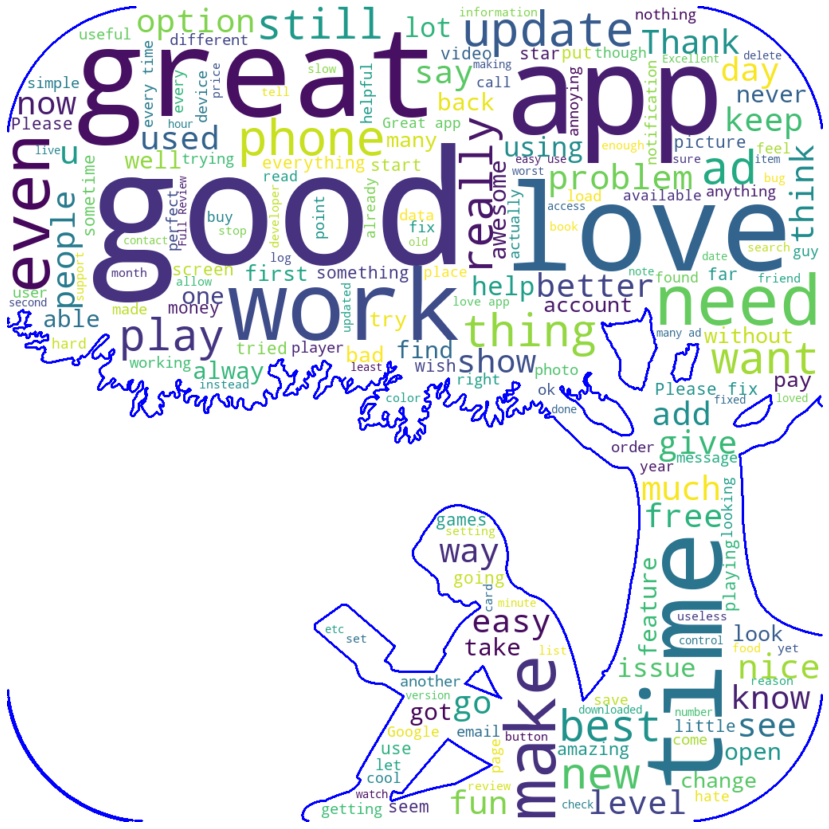

In [ ]:
# Now, let's create a Kindle logo-shaped word cloud for words in column Translated_Review.
# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords,mask= kindle_mask, background_color ="white",contour_width=3, contour_color='blue').generate(text)

plt.figure(figsize= (20,15))
plt.tight_layout(pad=0)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear') #this argument is to make the displayed image appear more smoothly.
plt.show()


# Conclusion

Summarizing our findings, suggesting other features

The PlayStore App and User Review dataset's appeared to be very rich datasets with a variety of columns that allowed us to do deep data exploration on each significant column presented.

First, we have found Category that takes good advantage of the PlayStore App and provides the most links; we got 33 unique categories and "FAMILY" being the top category on the basis of app counts. PERSONALIZATION, BUSINESS, MEDICAL are some catgories which have highest rated apps but, those apps have only few installs. When it comes to no. of apps installed other categories like FAMILY,GAME,TOOLS come into play.From genres point of view TOOLS, ENTERTAINMENT are top 2 genres with maximum no. of apps installed.

Facebook, WhatsApp Messenger, Instagram apps have maximum reviews. $(13.92, 2.99, 0.99) are the respective (mean, median, mode) price distribution of paid Apps. "Minecraft" app is generating maximum revenue. 8383 apps have no age restriction. 

Further we see another dataset "User Reviews". There are significant no. of apps having positive sentiments apps (ColorNote Notepad Notes	Positive, Calorie Counter - Macros	Positive, Family Locator, GPS Tracker	Positive, 8fit Workouts & Meal Planner	Positive, Calorie Counter) have most positive sentiments. When we compare Google News with BBC News, we found that it's almost similar ratio of both positive as well as negative review sentiments. In this EDA we tried to gives necessary insights by pointing out few most relevant columns which shows few significant data present in both datasets.   
